### belkacem dounia 





# **TP05 : Réduction de Bruit "Sel et Poivre" par Filtrage Médian Manuel**

---

## **1. Objectif**

L'objectif de ce TP est d'étudier l'efficacité du **filtre médian** pour la réduction du bruit impulsionnel, dit "sel et poivre", dans les images numériques.  
On applique ce filtre de manière itérative et avec différentes tailles de noyau pour observer son impact sur la qualité de l'image restaurée.

---

## **2. Méthodologie**

### **2.1. Ajout de bruit "sel et poivre"**

Un bruit impulsionnel est ajouté à l'image originale. Ce bruit se manifeste par l'apparition aléatoire de pixels noirs (valeur 0) et blancs (valeur 255), simulant des erreurs de transmission ou des défauts de capteurs.

### **2.2. Filtrage médian manuel**

Le **filtre médian** est un filtre non-linéaire particulièrement efficace contre ce type de bruit.  
Le principe est le suivant :
- Pour chaque pixel, on considère une fenêtre (noyau) centrée sur ce pixel (par exemple 3x3 ou 5x5).
- On remplace la valeur du pixel central par la médiane des valeurs contenues dans la fenêtre.

Dans ce TP, le filtre est appliqué :
- Une fois avec un noyau 3x3.
- Deux puis trois fois de suite avec un noyau 3x3 (itérations successives).
- Une fois avec un noyau 5x5 après trois passages en 3x3.

---

## **3. Résultats**
**Analyse :**
- Après un ou plusieurs passages du filtre médian 3x3, la majorité du bruit "sel et poivre" est éliminée, tout en préservant les contours de l'image.
- Un filtre 5x5 permet de supprimer les derniers points de bruit, mais peut commencer à lisser les détails fins de l'image.

---

## **4. Conclusion**

Le **filtre médian** s'avère très efficace pour la suppression du bruit impulsionnel sans trop altérer les structures de l'image.  
Cependant, l'application répétée ou l'utilisation de noyaux trop grands peut entraîner une perte de détails et un effet de flou.  
Pour des applications avancées, il est possible d'adapter dynamiquement la taille du noyau ou de combiner le filtrage médian avec d'autres techniques pour préserver au mieux la qualité de l'image.



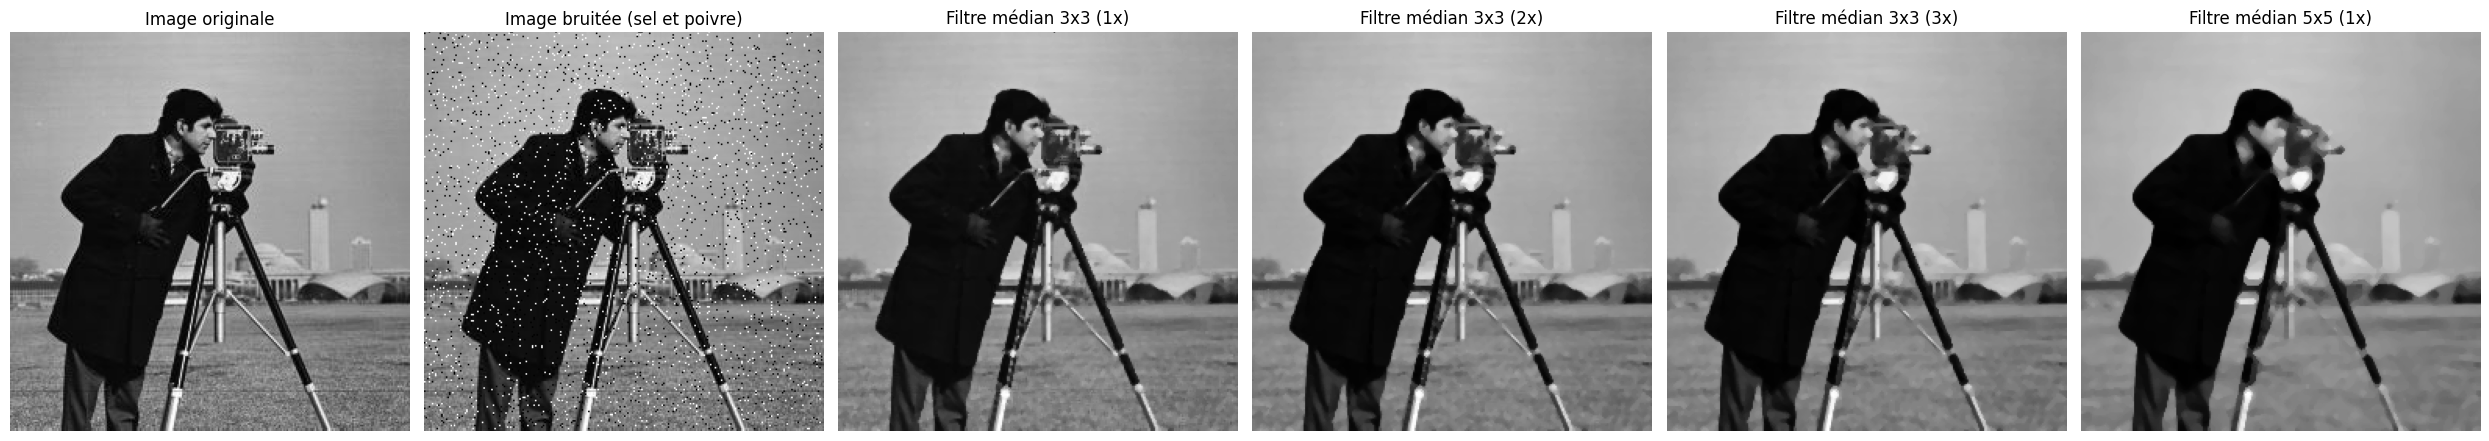

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Charger l'image et convertir en niveaux de gris
image_path = r"C:\Users\DELL\Desktop\tp_tim\pics\cameraman.jpg"
image = Image.open(image_path).convert('L')
image_array = np.array(image)



def add_salt_and_pepper_noise(image, prob=0.05):
  
    noisy_image = image.copy()
    num_salt = int(prob * image.size * 0.5)
    num_pepper = int(prob * image.size * 0.5)

    
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

   
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image


noisy_image = add_salt_and_pepper_noise(image_array, prob=0.05)



def apply_manual_median_filter(image, kernel_size):
   
    padded_image = np.pad(image, pad_width=kernel_size // 2, mode='edge')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            kernel = padded_image[i:i + kernel_size, j:j + kernel_size]
           
            filtered_image[i, j] = np.median(kernel)

    return filtered_image




filtered_image_1x = apply_manual_median_filter(noisy_image, 3)


filtered_image_2x = apply_manual_median_filter(filtered_image_1x, 3)


filtered_image_3x = apply_manual_median_filter(filtered_image_2x, 3)


filtered_image_5x5 = apply_manual_median_filter(filtered_image_3x, 5)



fig, axes = plt.subplots(1, 6, figsize=(25, 5))

axes[0].imshow(image_array, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title("Image bruitée (sel et poivre)")
axes[1].axis('off')

axes[2].imshow(filtered_image_1x, cmap='gray')
axes[2].set_title("Filtre médian 3x3 (1x)")
axes[2].axis('off')

axes[3].imshow(filtered_image_2x, cmap='gray')
axes[3].set_title("Filtre médian 3x3 (2x)")
axes[3].axis('off')

axes[4].imshow(filtered_image_3x, cmap='gray')
axes[4].set_title("Filtre médian 3x3 (3x)")
axes[4].axis('off')

axes[5].imshow(filtered_image_5x5, cmap='gray')
axes[5].set_title("Filtre médian 5x5 (1x)")
axes[5].axis('off')

plt.tight_layout()
plt.show()